# INFORME FINAL

#### OBJETIVO

En el presente trabajo se continuará profundizando el lo obtenido en el proyecto II, en el cual se entrenaron modelos avanzados para predecir el valor de porpiedades y así ayudar a los tazadores a definir el valor de una propiedad.
El objetivo es lograr desarrollar una Red Neuronal (para este caso 'Keras'), para así poder ampliar los estudios previos a más zonas como puede ser Zona Sur, Zona Oeste, entre otros.

#### HIPÓTESIS

Luego de la investigación que se llevo a cabo sobre el algoritmo propuesto para el presente trabajo, se cree que se logrará un modelo predictor igual o mejor que los modelos presentados para el informe II, siendo de mayor ayuda para los tazadores de propiedades.

#### METODOLOGIA

Para el desarrollo del trabajo se tuvo un orden como el que se muestra a continuación:

1) En primer lugar se procedio a la carga de datos, esta corresponde a al mismo DataSet utilizado en el Proyecto II.

2) Se continuo con una breve exploración de los datos no muy extensa, esto se debio a que se tiene como base el proyecto anterior en el cual se encuentra desarrollado de forma más precisa.

3. Luego se procedio a Transformar los datos que se encontraban de forma categórica a datos de forma númerica, se utilizaron dos metodologias las cuales se encuentran definidas a continuación:


* One Hot Encoding: toma una columna que tiene datos categóricos, que se han codificado en una etiqueta, y luego divide la columna en varias columnas. Los números se reemplazan por unos y ceros, según qué columna tenga qué valor.
* Label Encoding: consiste en aplicarle un valor numérico a las distintas variables categoricas que se encuentran en una columna.

4) A continuación, se decidio llenar los valores faltantes de nuestro DataSet, así poseeriamos más intancias (filas del DataSet) para entrenar el modelo que buscamos desarrollar. 

* Para Imputar los valores faltantes (rellenar los valores que figuran como NaN en nuestro DataSet con estadisticos) se decidio trabajar con el algoritmo 'SimpleImputer', el cual es simple de configurar y permite imputar con diversos estadisticos (mediana, la media o el valor mas frecuente) de cada columna en la que se encuentran los valores faltantes.

5)  Posterior a la imputación de valores faltantes se continuo con el estudio de los Outlayers, debido a que nuestro DataSet tenia valores que no que no podrían ser reales, como por ejemplo superficies de 1m2, lo que es algo fisicamente imposible.

* Para trabajar con los valores atipicos se decidió utilizar el método de las 3 sigmas, donde un intervalo de tres desviaciones estándar de radio representa el 99.7% de la población de la muestra que se estudia, considerando que nusetros datos poseen una 'distribución normal'. Esto se aplico a las variables "bedrooms","bathrooms","rooms", las cuales poseian una distribución muy similar a una normal. 

* Por el otro lado, para las variables "surface_total0","surface_covered","price" se aplico un filtrado por percentiles, debido a que las desviaciones de estas estaban sesgadas y por ende no se podía aplicar el método anterior. Esta técnica consiste en dividir la muestra en cien partes y definir los límites superiores e inferiores, las intancias que quedan fuera de estos limites se los eliminan.

Una vez que se aplico el método anterior nuestros estadisticos ya no presentaban valores que estuvieran fuera de lo real.

6) Posteriormente se decide realizar un escalado / normalizado de los datos, esto consiste en limitar los valores de las variables nuemericas entre valores que van de -3 a 3, con objeto de minimizar la redundancia de datos, facilitando su gestión posterior.

7) Una vez que se tenian los datos limpios, escalados, y sin valores atipicos se procedio a definir los modelos de Machine Learning que se desearian utilizar. Como modelo BenchMark se utilizó un XGBoost optimizado, el cual es el que mejores resultados nos brindo (menor error al predecir). En segundo lugar se trabajo con un modelo denominado 'Keras' el cual es una Red Neuronal de Código Abierto escrita en Python. Esta es capaz de ejecutarse sobre TensorFlow. Está especialmente diseñada para posibilitar la experimentación en más o menos poco tiempo con redes de Aprendizaje Profundo.

* Red Neuronal: son un modelo inspirado en el funcionamiento del cerebro humano. Esta formado por un conjunto de nodos conocidos como neuronas artificiales que están conectadas y transmiten señales entre sí. Estas señales se transmiten desde la entrada hasta generar una salida.  El objetivo principal de este modelo es aprender modificándose automáticamente a si mismo de forma que puede llegar a realizar tareas complejas que no podrían ser realizadas mediante la clásica programación basada en reglas. De esta forma se pueden automatizar funciones que en un principio solo podrían ser realizadas por personas.
* TensorFlow: TensorFlow es una plataforma de código abierto de extremo a extremo para el aprendizaje automático. TensorFlow facilita la creación de modelos de aprendizaje automático.

Para analizar los resultados obtenidos con los dos modelos predictores se decide utilizar 'El error cuadrático medio (RMSE)', el cual mide la cantidad de error que hay entre dos conjuntos de datos. En otras palabras, compara un valor predicho y un valor observado o conocido.

#### DESARROLLO

* En primer lugar importamos las librerias que y el dataset que trabajaremos a lo largo del proyecto

In [1]:
#Cargamos la librería para ignorar los Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Librerias matematicas y graficas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import folium
from folium import Marker
from folium.plugins import HeatMap #Permite realizar mapas de calor sobre el mapamundi

#Libreria para imputar los valores faltantes
from sklearn.impute import SimpleImputer

#Libreria para Escalar los datos
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#Librerias para el XGBoost
import xgboost as xgb
from xgboost import XGBRegressor

#Optimizadores del XGBoost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#Librerias de la Red Neuronal 'KERAS'
from keras import metrics
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
#Cargo el dataset
properati = pd.read_csv("DSp4.csv")

In [4]:
#Vemos como esta compuesto nuestro DataSet
properati.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

In [5]:
#Veo que culumnas tiene nuestro DataSet
properati.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [6]:
# Vemos las cantidad de de instancias y de columnas que posee nuestro dataset
properati.shape

(146660, 19)

In [7]:
# Filtro dataset por tipo de operación y moneda utilizada
properati = properati[(properati.operation_type == 'Venta') & (properati.currency == 'USD')]

### Esto se lo debe hacer ya que nos interesa predecir el valor de las ventas de las propiedades, entonces nos aseguramos así que no haya otros tipos de operación. Además, necesitamos 
### que las operaciones esten en la mismas moneda debido a que hay una gran diferencia en las unidades de las distintas monedas utilizadas.

In [8]:
#Descarto las columnas que no son de mi interes, estas no son útiles para llevar a cabo las predicciones
properati = properati.drop(columns=["l1","l2","description","title","currency","operation_type","title","description","start_date","end_date","created_on"])
properati.head()

lat        lon             l3  rooms  bedrooms  bathrooms  \
0 -34.605880 -58.384949  San Cristobal    7.0       7.0        2.0   
1 -34.624056 -58.412110          Boedo    2.0       1.0        2.0   
2 -34.593569 -58.427474        Palermo    2.0       1.0        1.0   
3 -34.581294 -58.436754        Palermo    2.0       1.0        1.0   
4 -34.914194 -57.938219       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price property_type  
0          140.0            140.0  153000.0  Departamento  
1           70.0             58.0  159000.0            PH  
2           45.0             45.0  125000.0            PH  
3           85.0             50.0  295000.0            PH  
4           50.0             35.0   40000.0            PH

* Graficamos en un mapa de calor donde es que se encuentran ubicadas las propiedades del dataset

In [9]:
data = properati.copy() #Creo una copia del dataset

map_1 = folium.Map(width = 700, height = 500, zoom_start=8.5,location=[-34.6946700, -58.3128700],control_scale=True,titles="cartodbposition")
df_arg_dolar_noLatNorLonMissing = data[data["lat"].notnull() & data["lon"].notnull()]
HeatMap(data=df_arg_dolar_noLatNorLonMissing[["lat","lon"]], radius=12).add_to(map_1)

map_1

Como observamos en el gráfico anterior en la zona de Capital Federal hay un punto mas oscuro, esto se debe a que hay una mayor cantidad de datos en dicha zona.

##### Transformación de datos

* One Hot Encoding para la variable 'property_type'

In [10]:
data.property_type.unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [11]:
data = pd.get_dummies(data,columns=["property_type"])

* Utilización de diccionario para la variable 'l3' la cual corresponde a la localidad

In [12]:
tipos = pd.Series(data['l3'])
tipos = tipos.value_counts()

tipos = pd.DataFrame(tipos).reset_index()
tipos.rename({"index": "l3","l3": "cantidad"}, axis=1, inplace=True)

tipos = tipos.set_index('l3')

dicc = tipos.to_dict()
dicc = dicc['cantidad']

data["l3"] = data.l3.map(dicc)
data.head()

lat        lon     l3  rooms  bedrooms  bathrooms  surface_total  \
0 -34.605880 -58.384949   1537    7.0       7.0        2.0          140.0   
1 -34.624056 -58.412110    928    2.0       1.0        2.0           70.0   
2 -34.593569 -58.427474  13073    2.0       1.0        1.0           45.0   
3 -34.581294 -58.436754  13073    2.0       1.0        1.0           85.0   
4 -34.914194 -57.938219   4354    2.0       1.0        1.0           50.0   

   surface_covered     price  property_type_Casa  property_type_Casa de campo  \
0            140.0  153000.0                   0                            0   
1             58.0  159000.0                   0                            0   
2             45.0  125000.0                   0                            0   
3             50.0  295000.0                   0                            0   
4             35.0   40000.0                   0                            0   

   property_type_Cochera  property_type_Departamento  property_type_Depósito  \
0                      0                           1                       0   
1                      0                           0                       0   
2                      0                           0                       0   
3                      0                           0                       0   
4                      0                           0                       0   

   property_type_Local comercial  property_type_Lote  property_type_Oficina  \
0                              0                   0                      0   
1                              0                   0                      0   
2                              0                   0                      0   
3                              0                   0                      0   
4                              0                   0                      0   

   property_type_Otro  property_type_PH  
0                   0                 0  
1                   0                 1  
2                   0                 1  
3                   0                 1  
4                   0                 1

##### Valores faltantes

Gráficamente podemos ver donde estan los datos faltantes dentro del dataset, ayudandosnos a tener una idea de la estructura de los datos

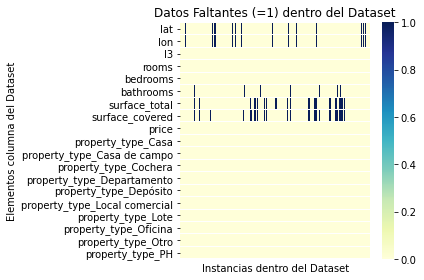

In [13]:
dat = data.isnull()
heat = sns.heatmap(dat.T, cmap = 'YlGnBu', xticklabels = False)
plt.title('Datos Faltantes (=1) dentro del Dataset')
plt.xlabel('Instancias dentro del Dataset')
plt.ylabel('Elementos columna del Dataset')
plt.tight_layout()

Del gráfico anterior se puede concluir que hay una cierta correlación entre los valores que faltan, por ejemplo viendo los datos que faltan en la superficie cubierta tambien faltan en la superficie total, lo mismo ocurre con la Latitud y la Longitud; y en algunos casos con las habitaciones y piezas.

* Valores fatantes en porcentaje de cada columna

In [14]:
data.isna().sum()/data.shape[0]*100

lat                               6.767353
lon                               6.790536
l3                                0.000000
rooms                             0.000000
bedrooms                          0.000000
bathrooms                         4.061776
surface_total                    13.996318
surface_covered                  14.737488
price                             0.000000
property_type_Casa                0.000000
property_type_Casa de campo       0.000000
property_type_Cochera             0.000000
property_type_Departamento        0.000000
property_type_Depósito            0.000000
property_type_Local comercial     0.000000
property_type_Lote                0.000000
property_type_Oficina             0.000000
property_type_Otro                0.000000
property_type_PH                  0.000000
dtype: float64

Se busca trabajar con los valores faltantes rellenandolos con los estadisticos correspondientes y así incluir mayor cantidad de intancias en nuestro modelo predictor.

Se optó por trabajar con el algoritmo de 'SimpleImputer', el cual proporciona estrategias básicas para imputar valores vacios (los que figurarn como NaN en el dataset). Los valores faltantes se pueden imputar con un valor constante proporcionado o utilizando las estadísticas (media, mediana o más frecuente) de cada columna en la que se encuentran los valores faltantes.

In [15]:
data.head()

lat        lon     l3  rooms  bedrooms  bathrooms  surface_total  \
0 -34.605880 -58.384949   1537    7.0       7.0        2.0          140.0   
1 -34.624056 -58.412110    928    2.0       1.0        2.0           70.0   
2 -34.593569 -58.427474  13073    2.0       1.0        1.0           45.0   
3 -34.581294 -58.436754  13073    2.0       1.0        1.0           85.0   
4 -34.914194 -57.938219   4354    2.0       1.0        1.0           50.0   

   surface_covered     price  property_type_Casa  property_type_Casa de campo  \
0            140.0  153000.0                   0                            0   
1             58.0  159000.0                   0                            0   
2             45.0  125000.0                   0                            0   
3             50.0  295000.0                   0                            0   
4             35.0   40000.0                   0                            0   

   property_type_Cochera  property_type_Departamento  property_type_Depósito  \
0                      0                           1                       0   
1                      0                           0                       0   
2                      0                           0                       0   
3                      0                           0                       0   
4                      0                           0                       0   

   property_type_Local comercial  property_type_Lote  property_type_Oficina  \
0                              0                   0                      0   
1                              0                   0                      0   
2                              0                   0                      0   
3                              0                   0                      0   
4                              0                   0                      0   

   property_type_Otro  property_type_PH  
0                   0                 0  
1                   0                 1  
2                   0                 1  
3                   0                 1  
4                   0                 1

In [16]:
#Convocamos el algoritmo
si = SimpleImputer(strategy='mean')           

In [17]:
#Entrenamos el modelo con el dataset
si.fit(data)

si.statistics_
#Convertimos los datos a la representación original
si.transform(data)
si.fit_transform(data)
#Cargamos la información a cada varible
data["lat"] = si.fit_transform(data["lat"].values.reshape(-1, 1))
data["lon"] = si.fit_transform(data["lon"].values.reshape(-1, 1))
data["bathrooms"] = si.fit_transform(data["bathrooms"].values.reshape(-1, 1))
data["surface_total"] = si.fit_transform(data["surface_total"].values.reshape(-1, 1))
data["surface_covered"] = si.fit_transform(data["surface_covered"].values.reshape(-1, 1))
data.head()

lat        lon     l3  rooms  bedrooms  bathrooms  surface_total  \
0 -34.605880 -58.384949   1537    7.0       7.0        2.0          140.0   
1 -34.624056 -58.412110    928    2.0       1.0        2.0           70.0   
2 -34.593569 -58.427474  13073    2.0       1.0        1.0           45.0   
3 -34.581294 -58.436754  13073    2.0       1.0        1.0           85.0   
4 -34.914194 -57.938219   4354    2.0       1.0        1.0           50.0   

   surface_covered     price  property_type_Casa  property_type_Casa de campo  \
0            140.0  153000.0                   0                            0   
1             58.0  159000.0                   0                            0   
2             45.0  125000.0                   0                            0   
3             50.0  295000.0                   0                            0   
4             35.0   40000.0                   0                            0   

   property_type_Cochera  property_type_Departamento  property_type_Depósito  \
0                      0                           1                       0   
1                      0                           0                       0   
2                      0                           0                       0   
3                      0                           0                       0   
4                      0                           0                       0   

   property_type_Local comercial  property_type_Lote  property_type_Oficina  \
0                              0                   0                      0   
1                              0                   0                      0   
2                              0                   0                      0   
3                              0                   0                      0   
4                              0                   0                      0   

   property_type_Otro  property_type_PH  
0                   0                 0  
1                   0                 1  
2                   0                 1  
3                   0                 1  
4                   0                 1

In [18]:
#Pasamos a corroborar que nuestro DataSet ya no posea valores faltantes
data.isna().sum()/data.shape[0]*100

lat                              0.0
lon                              0.0
l3                               0.0
rooms                            0.0
bedrooms                         0.0
bathrooms                        0.0
surface_total                    0.0
surface_covered                  0.0
price                            0.0
property_type_Casa               0.0
property_type_Casa de campo      0.0
property_type_Cochera            0.0
property_type_Departamento       0.0
property_type_Depósito           0.0
property_type_Local comercial    0.0
property_type_Lote               0.0
property_type_Oficina            0.0
property_type_Otro               0.0
property_type_PH                 0.0
dtype: float64

In [19]:
# Vemos la cantidad de intancias del DataSet
data.shape

(146660, 19)

Ahora poseemos una nuevo DataSet con la misma cantidad de intancias que el original, y sin valores faltantes

##### Eliminación de outlayers:

In [20]:
data.describe()

lat            lon             l3          rooms  \
count  146660.000000  146660.000000  146660.000000  146660.000000   
mean      -34.604896     -58.465304    4497.886786       3.079817   
std         0.452301       0.469392    3676.098362       1.416352   
min       -35.318457    -180.000000       5.000000       1.000000   
25%       -34.624216     -58.497253    1419.000000       2.000000   
50%       -34.603200     -58.448446    3339.000000       3.000000   
75%       -34.577975     -58.411457    6650.000000       4.000000   
max        85.051129     -57.805832   13073.000000      35.000000   

            bedrooms      bathrooms  surface_total  surface_covered  \
count  146660.000000  146660.000000  146660.000000    146660.000000   
mean        1.983240       1.599994     216.872888       112.818011   
std         1.151304       0.871076    1889.638072       846.604724   
min         0.000000       1.000000      10.000000         1.000000   
25%         1.000000       1.000000      56.000000        50.000000   
50%         2.000000       1.000000      91.000000        77.000000   
75%         3.000000       2.000000     216.872888       112.818011   
max        15.000000      14.000000  193549.000000    126062.000000   

              price  property_type_Casa  property_type_Casa de campo  \
count  1.466600e+05       146660.000000                146660.000000   
mean   2.412211e+05            0.146741                     0.002196   
std    3.185195e+05            0.353849                     0.046805   
min    5.500000e+03            0.000000                     0.000000   
25%    1.110000e+05            0.000000                     0.000000   
50%    1.660000e+05            0.000000                     0.000000   
75%    2.650000e+05            0.000000                     0.000000   
max    3.243423e+07            1.000000                     1.000000   

       property_type_Cochera  property_type_Departamento  \
count          146660.000000               146660.000000   
mean                0.001766                    0.731801   
std                 0.041987                    0.443023   
min                 0.000000                    0.000000   
25%                 0.000000                    0.000000   
50%                 0.000000                    1.000000   
75%                 0.000000                    1.000000   
max                 1.000000                    1.000000   

       property_type_Depósito  property_type_Local comercial  \
count           146660.000000                  146660.000000   
mean                 0.001807                       0.002216   
std                  0.042469                       0.047022   
min                  0.000000                       0.000000   
25%                  0.000000                       0.000000   
50%                  0.000000                       0.000000   
75%                  0.000000                       0.000000   
max                  1.000000                       1.000000   

       property_type_Lote  property_type_Oficina  property_type_Otro  \
count       146660.000000          146660.000000       146660.000000   
mean             0.008946               0.004487            0.002550   
std              0.094159               0.066832            0.050434   
min              0.000000               0.000000            0.000000   
25%              0.000000               0.000000            0.000000   
50%              0.000000               0.000000            0.000000   
75%              0.000000               0.000000            0.000000   
max              1.000000               1.000000            1.000000   

       property_type_PH  
count     146660.000000  
mean           0.097491  
std            0.296626  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

* Método 3 sigmas:

In [21]:
# Antes de pasar el método de las 3 sigmas anteriormente definido, se decide establecer como predeterminadas la sigueinte condición:

data = data[( data.surface_covered <= data.surface_total)] #La superficie cubierta no puede ser mayor que la superficie total de la propiedad

In [22]:
escalador = StandardScaler()
escalador.fit(data[["bedrooms","bathrooms","rooms"]])

StandardScaler()

In [23]:
data[["bedrooms","bathrooms","rooms"]] = escalador.transform(data[["bedrooms","bathrooms","rooms"]])

In [24]:
o_beedrooms = data[(data.bedrooms<-3) | (data.bedrooms>3)]
o_bathrooms = data[(data.bathrooms<-3) | (data.bathrooms>3)]
o_rooms     = data[(data.rooms<-3) | (data.rooms>3)]


outlayers = pd.concat([o_beedrooms,o_bathrooms,o_rooms])
outlayers.head()

lat        lon    l3     rooms  bedrooms  bathrooms  surface_total  \
0   -34.605880 -58.384949  1537  2.798429  4.392127   0.461523          140.0   
456 -34.599938 -58.492722  1361  4.936688  5.266716   2.764809         2000.0   
457 -34.673508 -58.355954  1370  3.511182  3.517538   2.764809          535.0   
513 -34.495416 -58.626764  8718  2.798429  3.517538   0.461523         2870.0   
557 -34.607778 -58.389769   678  2.085676  3.517538   0.461523          230.0   

     surface_covered      price  property_type_Casa  \
0              140.0   153000.0                   0   
456           1400.0  5000000.0                   1   
457            535.0   650000.0                   1   
513            186.0   425000.0                   1   
557            230.0   295000.0                   0   

     property_type_Casa de campo  property_type_Cochera  \
0                              0                      0   
456                            0                      0   
457                            0                      0   
513                            0                      0   
557                            0                      0   

     property_type_Departamento  property_type_Depósito  \
0                             1                       0   
456                           0                       0   
457                           0                       0   
513                           0                       0   
557                           0                       0   

     property_type_Local comercial  property_type_Lote  property_type_Oficina  \
0                                0                   0                      0   
456                              0                   0                      0   
457                              0                   0                      0   
513                              0                   0                      0   
557                              0                   0                      0   

     property_type_Otro  property_type_PH  
0                     0                 0  
456                   0                 0  
457                   0                 0  
513                   0                 0  
557                   0                 1

In [25]:
data.drop(outlayers.index ,axis=0, inplace=True)

In [26]:
data[["bedrooms","bathrooms","rooms"]] = escalador.inverse_transform(data[["bedrooms","bathrooms","rooms"]])

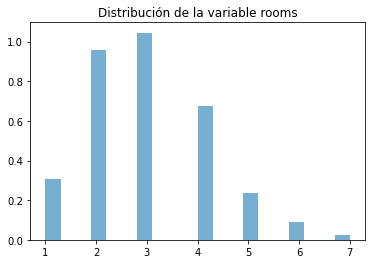

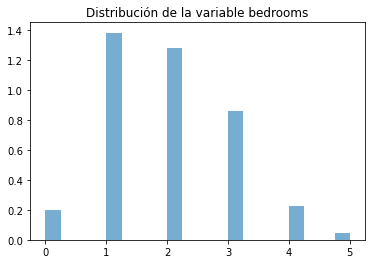

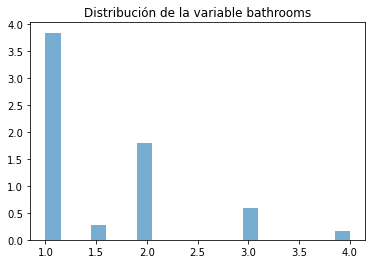

In [27]:
'''Veo como estan distribuidas las variables luego de haber aplicado filtros'''

#'---------------------------------------------------------------'
plt.hist(data.rooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable rooms')
plt.show()
#'---------------------------------------------------------------'
plt.hist(data.bedrooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable bedrooms')
plt.show()
#'---------------------------------------------------------------'
plt.hist(data.bathrooms, bins=20, density=True, alpha=0.6)
plt.title('Distribución de la variable bathrooms')
plt.show()

* Filtrado por percentiles

In [28]:
#Variable surface_total
p_1 = data.surface_total.quantile(0.1)
p_2 = data.surface_total.quantile(0.98)
data = data[data.surface_total.gt(p_1) & data.surface_total.lt(p_2)]

In [29]:
#Variable price
p_1 = data.price.quantile(0.1)
p_2 = data.price.quantile(0.98)
data = data[data.price.gt(p_1) & data.price.lt(p_2)]

In [30]:
#Variable surface_covered
p_1 = data.surface_covered.quantile(0.1)
p_2 = data.surface_covered.quantile(0.98)
data = data[data.surface_covered.gt(p_1) & data.surface_covered.lt(p_2)]

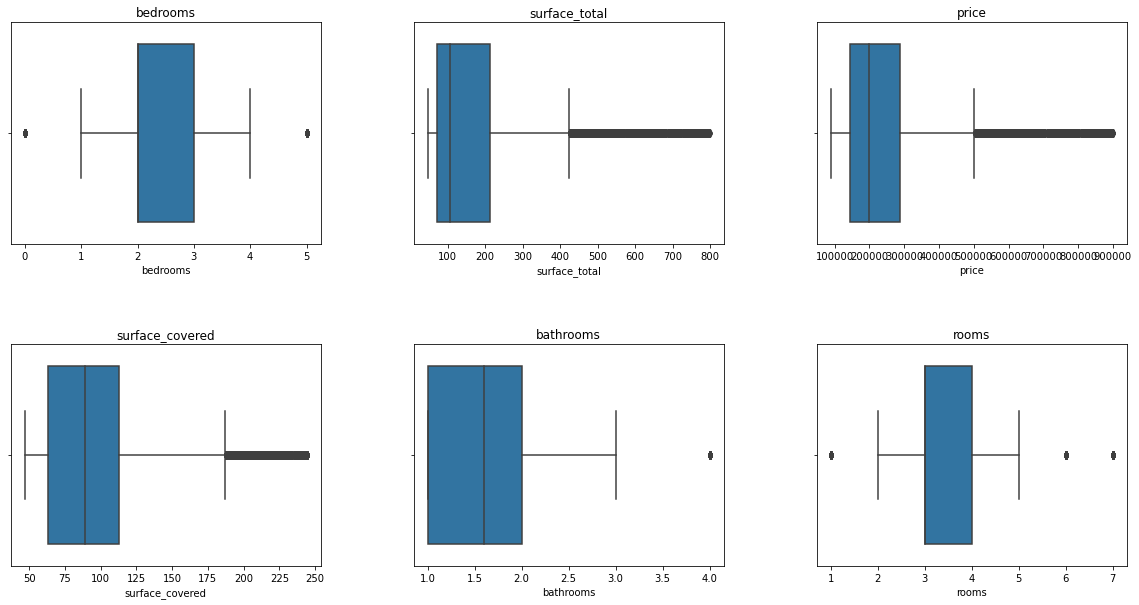

In [31]:
plt.figure(figsize = (20,10))
plt.subplots_adjust(wspace = 0.3,hspace = 0.45)

plt.subplot(2,3,1)
sns.boxplot(data['bedrooms']);
plt.title('bedrooms');

plt.subplot(2,3,2)
sns.boxplot(data['surface_total']);
plt.title('surface_total');

plt.subplot(2,3,3)
sns.boxplot(data['price']);
plt.title('price');

plt.subplot(2,3,4)
sns.boxplot(data['surface_covered']);
plt.title('surface_covered');

plt.subplot(2,3,5)
sns.boxplot(data['bathrooms']);
plt.title('bathrooms');

plt.subplot(2,3,6)
sns.boxplot(data['rooms']);
plt.title('rooms');

plt.show()

In [32]:
data.describe()

lat           lon            l3         rooms      bedrooms  \
count  93862.000000  93862.000000  93862.000000  93862.000000  93862.000000   
mean     -34.600390    -58.463437   4731.749931      3.289276      2.157103   
std        0.401155      0.415580   3709.493512      1.054899      0.969272   
min      -35.123742   -180.000000      5.000000      1.000000      0.000000   
25%      -34.620670    -58.492137   1450.000000      3.000000      2.000000   
50%      -34.602098    -58.448342   3599.000000      3.000000      2.000000   
75%      -34.575821    -58.413412   6935.000000      4.000000      3.000000   
max       85.051129    -57.805832  13073.000000      7.000000      5.000000   

          bathrooms  surface_total  surface_covered          price  \
count  93862.000000   93862.000000     93862.000000   93862.000000   
mean       1.666116     138.408749        95.044927  240075.256494   
std        0.744074      93.797807        38.796521  137358.978592   
min        1.000000      47.000000        47.000000   89040.000000   
25%        1.000000      72.000000        63.000000  145000.000000   
50%        1.599994     105.000000        89.000000  200000.000000   
75%        2.000000     213.000000       112.818011  288000.000000   
max        4.000000     798.000000       244.000000  899000.000000   

       property_type_Casa  property_type_Casa de campo  property_type_Cochera  \
count        93862.000000                 93862.000000           93862.000000   
mean             0.143232                     0.000831               0.000043   
std              0.350311                     0.028815               0.006528   
min              0.000000                     0.000000               0.000000   
25%              0.000000                     0.000000               0.000000   
50%              0.000000                     0.000000               0.000000   
75%              0.000000                     0.000000               0.000000   
max              1.000000                     1.000000               1.000000   

       property_type_Departamento  property_type_Depósito  \
count                93862.000000            93862.000000   
mean                     0.728325                0.001960   
std                      0.444826                0.044232   
min                      0.000000                0.000000   
25%                      0.000000                0.000000   
50%                      1.000000                0.000000   
75%                      1.000000                0.000000   
max                      1.000000                1.000000   

       property_type_Local comercial  property_type_Lote  \
count                   93862.000000        93862.000000   
mean                        0.002280            0.006882   
std                         0.047695            0.082675   
min                         0.000000            0.000000   
25%                         0.000000            0.000000   
50%                         0.000000            0.000000   
75%                         0.000000            0.000000   
max                         1.000000            1.000000   

       property_type_Oficina  property_type_Otro  property_type_PH  
count           93862.000000        93862.000000      93862.000000  
mean                0.004123            0.001779          0.110545  
std                 0.064079            0.042143          0.313570  
min                 0.000000            0.000000          0.000000  
25%                 0.000000            0.000000          0.000000  
50%                 0.000000            0.000000          0.000000  
75%                 0.000000            0.000000          0.000000  
max                 1.000000            1.000000          1.000000

La variable 'bedrooms' dice que posee como estadistico minimo igual a cero, esto se decide dejarlo así debido a que para los departamentos monoambientes por lo general no se discriminan las habitaciones como ambiente separado.

In [33]:
data.shape

(93862, 19)

Luego de aplicar las dos metodologias de filtrado contamos con más de 90.000 intancias para agregar a los modelos predictores, además de haber mejorado nuestros estadisticos.


##### Escalado / Normalización de los datos

Se decide realizar un escalonado en nuestro Dataset para tener nuestros valores en un limite de -3 a 3, con objeto de minimizar la redundancia de datos, facilitando su gestión posterior.

In [34]:
data.columns

Index(['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'property_type_Casa',
       'property_type_Casa de campo', 'property_type_Cochera',
       'property_type_Departamento', 'property_type_Depósito',
       'property_type_Local comercial', 'property_type_Lote',
       'property_type_Oficina', 'property_type_Otro', 'property_type_PH'],
      dtype='object')

In [35]:
escalador = StandardScaler()
escalador.fit(data[['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total','surface_covered']])

StandardScaler()

In [36]:
data[['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total','surface_covered']] = escalador.transform(data[['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total','surface_covered']])

In [37]:
data.head()

lat       lon        l3     rooms  bedrooms  bathrooms  surface_total  \
1 -0.058994  0.123508 -1.025415 -1.222186 -1.193792   0.448726      -0.729325   
3  0.047603  0.064208  2.248634 -1.222186 -1.193792  -0.895233      -0.569406   
5  0.016480  0.053416  0.475067 -1.222186 -1.193792  -0.895233      -0.878583   
6 -0.001491  0.073093  0.475067 -1.222186 -1.193792  -0.895233      -0.729325   
7 -0.001491  0.073093  0.475067 -1.222186 -1.193792  -0.895233      -0.729325   

   surface_covered     price  property_type_Casa  property_type_Casa de campo  \
1        -0.954857  159000.0                   0                            0   
3        -1.161062  295000.0                   0                            0   
5        -1.006408  150000.0                   0                            0   
6        -0.645549  159500.0                   0                            0   
7        -0.645549  159500.0                   0                            0   

   property_type_Cochera  property_type_Departamento  property_type_Depósito  \
1                      0                           0                       0   
3                      0                           0                       0   
5                      0                           0                       0   
6                      0                           0                       0   
7                      0                           0                       0   

   property_type_Local comercial  property_type_Lote  property_type_Oficina  \
1                              0                   0                      0   
3                              0                   0                      0   
5                              0                   0                      0   
6                              0                   0                      0   
7                              0                   0                      0   

   property_type_Otro  property_type_PH  
1                   0                 1  
3                   0                 1  
5                   0                 1  
6                   0                 1  
7                   0                 1

### Modelos predictores - Machine Learning

##### Modelo Benchmarck

Como modelo Benchmarck se elige el modelo del proyecto II que mejores resultados entrego a la hora de predecir, este es un XGBoost optimizado con el GridSerch.

In [38]:
# Definimos las variables de entrada (X) y nuestra variable Target (y)

X=data.drop(["price"],axis=1)
y=data["price"]

#Dividimos nuestro set de datos en datdos para entrenar y otros para evaluar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

RMSE en Train es: 10713.921284223703
RMSE en Test es: 53256.60485421555


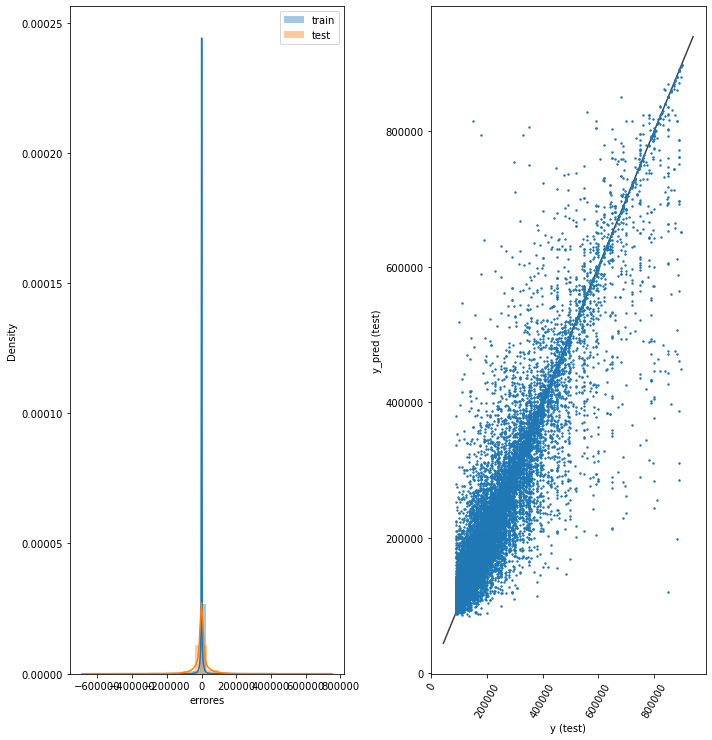

In [39]:
XGB = XGBRegressor(eval_metric = 'rmse', learning_rate = 0.1, max_depth = 30, n_estimators = 120, random_state = 42);

#Entrenamos el modelo
XGB.fit(X_train, y_train);

#Predecimos
y_train_pred_xgb = XGB.predict(X_train)
y_test_pred_xgb = XGB.predict(X_test)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("RMSE en Train es:",rmse_train_xgb)
print("RMSE en Test es:",rmse_test_xgb)

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_xgb, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_xgb, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_xgb, s =2)
   
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]), 
np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.xticks(rotation=60);
plt.show()

#### Optimizamos el XGBoost:

En una primer intancia se decide trabajar con Random Search para encontrar la zona por donde se encuentran los mejores candidatos para los hiperparametros, esto se lo hizo así para reducir el tiempo de calculo y poder aumentar la velocidad de optimización.

In [40]:
#Nombramos el predictor 
XGBoost = XGBRegressor()
#Definimos el rango de hiperparametros que se desea analisar
params_XGBoost = {'max_depth': range (11,20,1),'n_estimators': range(150, 250, 10),'learning_rate': [0.1, 0.01],'eval_metric':['rmse'],'random_state':[42]}
#Nombramos el RansomSerch ingresandole el modelo predictor y sus parámetros a analizar
model_XGB = RandomizedSearchCV(XGBoost, param_distributions = params_XGBoost, cv=3, n_jobs=-1)
#Entrenemos el modelo
model_XGB.fit(X_train,y_train)
#Presentamos el modelo optimo
print("Mejores parametros: "+str(model_XGB.best_params_))
print("Mejor Score: "+str(model_XGB.best_score_)+'\n')

scores = pd.DataFrame(model_XGB.cv_results_)
scores.sort_values(by="rank_test_score")

Mejores parametros: {'random_state': 42, 'n_estimators': 180, 'max_depth': 11, 'learning_rate': 0.1, 'eval_metric': 'rmse'}
Mejor Score: 0.8281291195176849



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7      41.782945      0.350710         0.065824        0.001410   
9      52.994698      2.474488         0.145942        0.048274   
6      85.615855      0.890872         0.171883        0.025768   
5     101.823701      1.494310         0.187498        0.014815   
1      91.424448      0.383425         0.264293        0.070131   
8      88.055373      1.850756         0.200462        0.055013   
0     109.168003      0.724961         0.237365        0.014927   
3      85.174431      1.004520         0.176205        0.017113   
4      66.751174      1.100587         0.132977        0.016455   
2      40.164880      0.801427         0.080119        0.021240   

  param_random_state param_n_estimators param_max_depth param_learning_rate  \
7                 42                180              11                 0.1   
9                 42                220              14                 0.1   
6                 42                240              15                 0.1   
5                 42                190              19                 0.1   
1                 42                240              14                0.01   
8                 42                210              18                0.01   
0                 42                200              18                0.01   
3                 42                160              18                0.01   
4                 42                160              15                0.01   
2                 42                160              11                0.01   

  param_eval_metric                                             params  \
7              rmse  {'random_state': 42, 'n_estimators': 180, 'max...   
9              rmse  {'random_state': 42, 'n_estimators': 220, 'max...   
6              rmse  {'random_state': 42, 'n_estimators': 240, 'max...   
5              rmse  {'random_state': 42, 'n_estimators': 190, 'max...   
1              rmse  {'random_state': 42, 'n_estimators': 240, 'max...   
8              rmse  {'random_state': 42, 'n_estimators': 210, 'max...   
0              rmse  {'random_state': 42, 'n_estimators': 200, 'max...   
3              rmse  {'random_state': 42, 'n_estimators': 160, 'max...   
4              rmse  {'random_state': 42, 'n_estimators': 160, 'max...   
2              rmse  {'random_state': 42, 'n_estimators': 160, 'max...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
7           0.824650           0.833606           0.826131         0.828129   
9           0.824553           0.833900           0.825240         0.827898   
6           0.822942           0.832582           0.822245         0.825923   
5           0.813076           0.826714           0.816329         0.818707   
1           0.762840           0.766981           0.758797         0.762872   
8           0.729523           0.737468           0.728795         0.731929   
0           0.713597           0.721571           0.712816         0.715995   
3           0.611035           0.619740           0.612030         0.614268   
4           0.611408           0.618064           0.611604         0.613692   
2           0.596128           0.604789           0.594562         0.598493   

   std_test_score  rank_test_score  
7        0.003920                1  
9        0.004253                2  
6        0.004717                3  
5        0.005816                4  
1        0.003341                5  
8        0.003928                6  
0        0.003956                7  
3        0.003890                8  
4        0.003092                9  
2        0.004498               10

Gracias al RandomSearch pudimos encontrar la zona donde se encuentra la mejor optimizacion del modelo y con esos resultados acotar el rango de los hiperparametros a probar por el GridSerch y por ende el tiempo de procesamiento.

In [41]:
#Nombramos el predictor 
XGBoost = XGBRegressor()
#Definimos el rango de hiperparametros que se desea analisar
params_XGBoost = {'max_depth': range (10,15,1),'n_estimators': range(170, 200, 10),'learning_rate': [0.1, 0.01],'eval_metric':['rmse'],'random_state':[42]}
#Nombramos el GridSerch ingresandole el modelo predictor y sus parámetros a analizar
model_XGB = GridSearchCV(XGBoost,param_grid=params_XGBoost, cv=4,n_jobs=-1)
#Entrenemos el modelo
model_XGB.fit(X_train,y_train)
#Presentamos el modelo optimo
print("Mejores parametros: "+str(model_XGB.best_params_))
print("Mejor Score: "+str(model_XGB.best_score_)+'\n')

scores = pd.DataFrame(model_XGB.cv_results_)
scores.sort_values(by="rank_test_score")

Mejores parametros: {'eval_metric': 'rmse', 'learning_rate': 0.1, 'max_depth': 13, 'n_estimators': 190, 'random_state': 42}
Mejor Score: 0.837941029330393



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
11      58.468721      0.583698         0.085771        0.021472   
10      56.296513      0.356256         0.078041        0.009232   
14      67.055305      1.375401         0.089012        0.013952   
9       53.467716      0.418348         0.072556        0.015033   
13      62.485324      1.292613         0.085278        0.021510   
12      59.239490      1.125586         0.089267        0.018142   
8       52.243760      0.395578         0.069318        0.012025   
5       47.565105      0.281008         0.060339        0.007209   
7       49.312485      0.311523         0.061834        0.014210   
6       47.545156      0.429038         0.063082        0.002271   
4       45.849452      0.278571         0.056100        0.009628   
3       42.052208      0.093484         0.053361        0.011244   
2       41.099150      0.455411         0.063580        0.002939   
1       39.688709      0.315366         0.059341        0.009501   
0       37.173878      0.490896         0.055353        0.012020   
29      66.886370      4.473953         0.131140        0.037039   
26      71.122533      0.496981         0.099484        0.018054   
23      62.179004      0.496927         0.080549        0.009681   
20      54.602317      0.620480         0.059341        0.007741   
28      75.277469      0.505464         0.120677        0.020108   
25      66.771943      0.645859         0.100729        0.019847   
17      46.930864      0.742745         0.068566        0.010750   
22      59.218653      0.489929         0.091007        0.019599   
19      55.429657      0.466722         0.087267        0.013240   
27      71.109897      0.596885         0.108964        0.016262   
16      45.327173      0.280852         0.057347        0.006856   
24      62.961914      0.554140         0.089012        0.018109   
21      55.961985      0.409504         0.079575        0.017321   
18      52.819647      0.477540         0.062334        0.014131   
15      40.448266      0.260950         0.046380        0.007410   

   param_eval_metric param_learning_rate param_max_depth param_n_estimators  \
11              rmse                 0.1              13                190   
10              rmse                 0.1              13                180   
14              rmse                 0.1              14                190   
9               rmse                 0.1              13                170   
13              rmse                 0.1              14                180   
12              rmse                 0.1              14                170   
8               rmse                 0.1              12                190   
5               rmse                 0.1              11                190   
7               rmse                 0.1              12                180   
6               rmse                 0.1              12                170   
4               rmse                 0.1              11                180   
3               rmse                 0.1              11                170   
2               rmse                 0.1              10                190   
1               rmse                 0.1              10                180   
0               rmse                 0.1              10                170   
29              rmse                0.01              14                190   
26              rmse                0.01              13                190   
23              rmse                0.01              12                190   
20              rmse                0.01              11                190   
28              rmse                0.01              14                180   
25              rmse                0.01              13                180   
17              rmse                0.01              10                190   
22              rmse                0.01              12                180   

In [42]:
#Predecimos con el modelo optimizado
model_XGB.predict(X_test)

array([530408.5  , 219732.05 , 210324.53 , ..., 116359.586, 196242.58 ,
       161992.88 ], dtype=float32)

In [43]:
#Mostramos el puntaje de aciertos con este puntaje
model_XGB.score(X_test,y_test)

0.8603884388238461

RMSE en Train es: 22333.99962394874
RMSE en Test es: 51709.784947158456


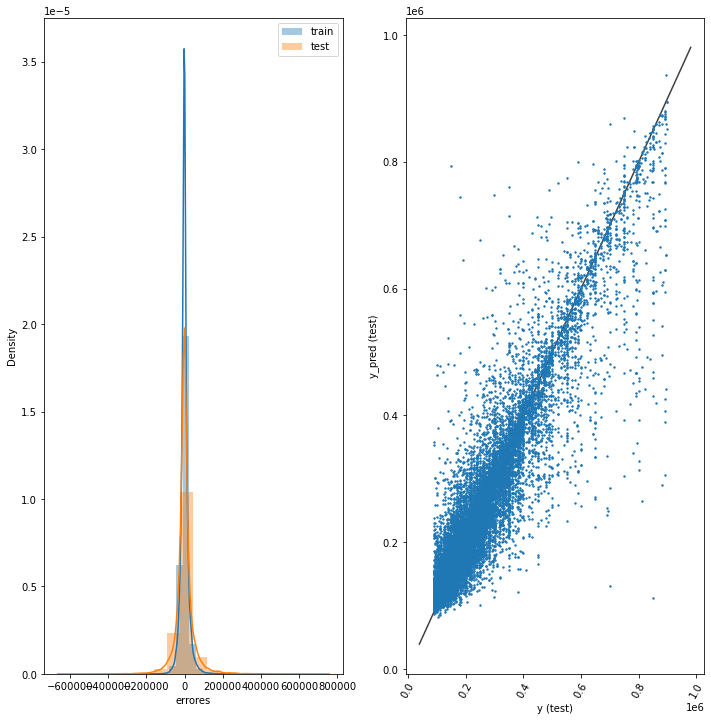

In [44]:
#Predecimos y graficamos la distribución de nuestras predicciones

y_train_pred_XGB = model_XGB.predict(X_train)
y_test_pred_XGB = model_XGB.predict(X_test)

rmse_train_XGB = np.sqrt(mean_squared_error(y_train, y_train_pred_XGB))
rmse_test_XGB = np.sqrt(mean_squared_error(y_test, y_test_pred_XGB))

print("RMSE en Train es:",rmse_train_XGB)
print("RMSE en Test es:",rmse_test_XGB)

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_XGB, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_XGB, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_XGB, s =2)
   
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]), 
np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.xticks(rotation=60);
plt.show()

Pero como podemos observar nuestro modelo posee un bajo sesgo y una alta varianza debido a la diferencia que presenta en el train y test, por lo que podemos afirmar que nuestro modelo esta sobreajustado. En estos casos se debe bajar la complejidad del modelo, lo cual hace que nuestro error aumente pero nos aseguramos de no estar sobreajustando el modelo.

RMSE en Train es: 43974.425075689076
RMSE en Test es: 56294.266579254676


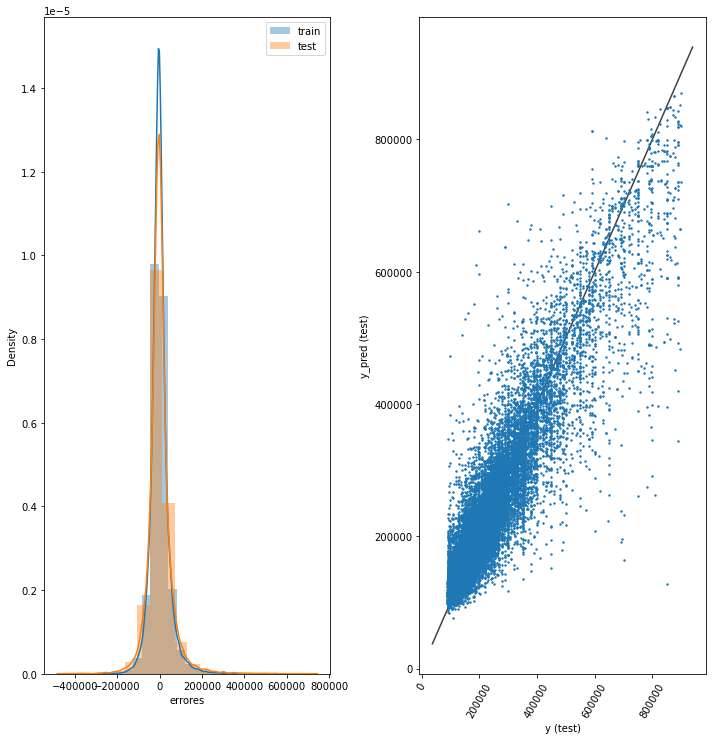

In [45]:
XGB = XGBRegressor(eval_metric = 'rmse', learning_rate = 0.1, max_depth = 9, n_estimators = 150, random_state = 42);

#Entrenamos el modelo
XGB.fit(X_train, y_train);

#Predecimos
y_train_pred_xgb = XGB.predict(X_train)
y_test_pred_xgb = XGB.predict(X_test)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("RMSE en Train es:",rmse_train_xgb)
print("RMSE en Test es:",rmse_test_xgb)

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_xgb, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_xgb, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_xgb, s =2)
   
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]), 
np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.xticks(rotation=60);
plt.show()

Bajando la complejidad del modelo pudimos disminuir la varianza a pesar de que nuestro error aumenta, pero ahora nos aseguramos de que el modelo no esta sobreajustado.

### REDES NUERONALES

Antes de arrancar con el modelo preditor propuesto, debemos entender que es una red neuronal artificial.

Las redes neuronales artificiales consiste en un conjunto de unidades, llamadas neuronas artificiales, conectadas entre sí para transmitirse señales. La información de entrada atraviesa la red neuronal (donde se somete a diversas operaciones) produciendo unos valores de salida.

Cada neurona está conectada con otras a través de unos enlaces. En estos enlaces el valor de salida de la neurona anterior es multiplicado por un valor de peso. Estos pesos en los enlaces pueden incrementar o inhibir el estado de activación de las neuronas adyacentes. Del mismo modo, a la salida de la neurona, puede existir una función limitadora o umbral, que modifica el valor resultado o impone un límite que no se debe sobrepasar antes de propagarse a otra neurona. Esta función se conoce como función de activación.

Estos sistemas aprenden y se forman a sí mismos. Para realizar este aprendizaje automático, normalmente, se intenta minimizar una función de pérdida que evalúa la red en su total. Los valores de los pesos de las neuronas se van actualizando buscando reducir el valor de la función de pérdida. Este proceso se realiza mediante la propagación hacia atrás.

<img src=https://upload.wikimedia.org/wikipedia/commons/6/64/RedNeuronalArtificial.png>


        Imagen ilustrativa del funcionamiento de una Red Neuronal

##### KERAS

Keras es una biblioteca de Redes Neuronales de Código Abierto escrita en Python. Es capaz de ejecutarse sobre TensorFlow, Microsoft Cognitive Toolkit o Theano. Está especialmente diseñada para posibilitar la experimentación en más o menos poco tiempo con redes de Aprendizaje Profundo.

Keras contiene varias implementaciones de los bloques constructivos de las redes neuronales como por ejemplo los layers, funciones objetivo, funciones de activación, optimizadores matemáticos.

* Hiperparametros:

1. Dense: implementa la operación: output = activation(dot(input, kernel) + bias) donde 'activation' pasa la función de activación por elementos como activation argumento, kerneles una matriz de ponderaciones creada por la capa y biases un vector de sesgo creado por la capa (solo aplicable si lo use_biases True). Todos estos son atributos de Dense.

La capa densa realiza la siguiente operación en la entrada y devuelve la salida.

output = activation(dot(input, kernel) + bias)

dónde,

    * input -> representan los datos de entrada

    * kernel -> representan los datos de peso

    * dot -> representa el producto escalar numpy de toda la entrada y sus pesos correspondientes

    * bias -> representa un valor sesgado utilizado en el aprendizaje automático para optimizar el modelo.

    * activation -> representa la función de activación.

El resultado es la salida y se pasará a la siguiente capa.

2) Activation:

* relu: aplica la función de activación de la unidad lineal rectificada.
* sigmoid: Aplica la función de activación sigmoidea. Para valores pequeños (<-5), sigmoid devuelve un valor cercano a cero, y para valores grandes (> 5) el resultado de la función se acerca a 1.
* softmax: convierte un vector de valores en una distribución de probabilidad.

En este caso se elige la función de activación 'relu', debido a que la segunda es aplicada solo para valores pequeños y la segunda poseía errores mucho más elevados que la primera

3. Optimizer:

* Adaptive Gradient Algorithm (AdaGrad) - introduce una variación muy interesante en el concepto de factor de entrenamiento: en vez de considerar un valor uniforme para todos los pesos, se mantiene un factor de entrenamiento específico para cada uno de ellos. Sería inviable calcular este valor de forma específica así que, partiendo del factor de entrenamiento inicial, AdaGrad lo escala y adapta para cada dimensión con respecto al gradiente acumulado en cada iteración.
* Adadelta - variación de AdaGrad en la que en vez de calcular el escalado del factor de entrenamiento de cada dimensión teniendo en cuenta el gradiente acumulado desde el principio de la ejecución, se restringe a una ventana de tamaño fijo de los últimos n gradientes.
* RMSprop (Root Mean Square Propagation) - mantiene un factor de entrenamiento diferente para cada dimensión, pero en este caso el escalado del factor de entrenamiento se realiza dividiéndolo por la media del declive exponencial del cuadrado de los gradientes (glup!)
* Adam (Adaptive moment estimation) - combina las bondades de AdaGrad y RMSProp. Se mantiene un factor de entrenamiento por parámetro y además de calcular RMSProp, cada factor de entrenamiento también se ve afectado por la media del momentum del gradiente.

Para este caso se fueron probando los distintos optimizadores presentados en la parte superior y se eligió el que mejor rendimiento nos daba a la hora de entrenarlo. Este es el 'RMSprop'

4. Epochs

Es un límite arbitrario, generalmente definido como "una pasada sobre todo el conjunto de datos", se utiliza para separar el entrenamiento en distintas fases, es útil para el registro y la evaluación periódica.

In [46]:
# Definimos las variables de entrada (X) y nuestra variable Target (y)

X = data[['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'property_type_Casa',
       'property_type_Casa de campo', 'property_type_Cochera',
       'property_type_Departamento', 'property_type_Depósito',
       'property_type_Local comercial', 'property_type_Lote',
       'property_type_Oficina', 'property_type_Otro', 'property_type_PH']].values

y = data['price'].values

#Dividimos nuestro set de datos en datdos para entrenar y otros para evaluar el modelo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(65703, 18)
(28159, 18)


In [47]:
# Definimos el modelo
model = Sequential()
model.add(Dense(1000, input_dim=18, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(10, activation= "relu"))
model.add(Dense(5, activation= "relu"))
model.add(Dense(1))

model.summary() #Print model Summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              19000     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 124,721
Trainable params: 124,721
Non-trainable params: 0
__________________________________________________

In [48]:
model.compile(loss= "mean_squared_error" , optimizer="RMSprop", metrics=["mean_squared_error"])

In [49]:
model.fit(X_train, y_train, epochs=300);

Epoch 1/200
2054/2054 [==============================] - 5s 2ms/step - loss: 16046938112.0000 - mean_squared_error: 16046938112.0000
Epoch 2/200
2054/2054 [==============================] - 4s 2ms/step - loss: 13929689088.0000 - mean_squared_error: 13929689088.0000
Epoch 3/200
2054/2054 [==============================] - 4s 2ms/step - loss: 20491028480.0000 - mean_squared_error: 20491028480.0000
Epoch 4/200
2054/2054 [==============================] - 4s 2ms/step - loss: 22809317376.0000 - mean_squared_error: 22809317376.0000
Epoch 5/200
2054/2054 [==============================] - 4s 2ms/step - loss: 21754120192.0000 - mean_squared_error: 21754120192.0000
Epoch 6/200
2054/2054 [==============================] - 4s 2ms/step - loss: 22734817280.0000 - mean_squared_error: 22734817280.0000
Epoch 7/200
2054/2054 [==============================] - 4s 2ms/step - loss: 24362072064.0000 - mean_squared_error: 24362072064.0000
Epoch 8/200
2054/2054 [==============================] - 4s 2ms/step 

In [50]:
pred_train= model.predict(X_train)
print("RMSE en Train es: ",np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print("RMSE en Test es: ",np.sqrt(mean_squared_error(y_test,pred))) 

RMSE en Train es:  61557.580259143244
RMSE en Test es:  68383.47182851123


#### Conclusiones 

En primer lugar, se pude decir que se logró cumplir el objetivo principal del proyecto, se pudo programar correctamente el modelo propuesto cumpliendo su finalidad, a pesar de que no se haya podido disminuir el error por debajo del benchamark, igual se puede afirmar que es un buen modelo predictor, debido a que no se posee ni sesgo ni varianza. 

Por otro lado, en el presentre trabajo se le agregaron más zonas para predecir, no como en el proyecto anterior en el cual nos hemos basado, que solo se entreno a los modelos con la zona de Capital Federal, por lo que es razonable que el error sea mayor para este caso.

En lo personal fue una gran experiencia el haber desarrollado un modelo de aprendizaje profundo, aunque en un principio se me dificulto comprender como es que funcionaba correctamente esta clase de algoritmos, debido a que los modelos con los que estaba acostumbrado a trabajar son más comprensibles y llevaderos, logré superar los obtaculos de una manera satisfactoria, quedando conforme con los resultados de dicho informe.